**DS 301: Applied Data Modeling and Predictive Analysis**

# Detecting Diabetes in the Early Stages

Justin Park, 2 December 2022

Dataset: https://www.kaggle.com/datasets/whenamancodes/predict-diabities

**Get the Data.**

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data_path = os.path.join("datasets", "diabetes.csv")
data = pd.read_csv(data_path)
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

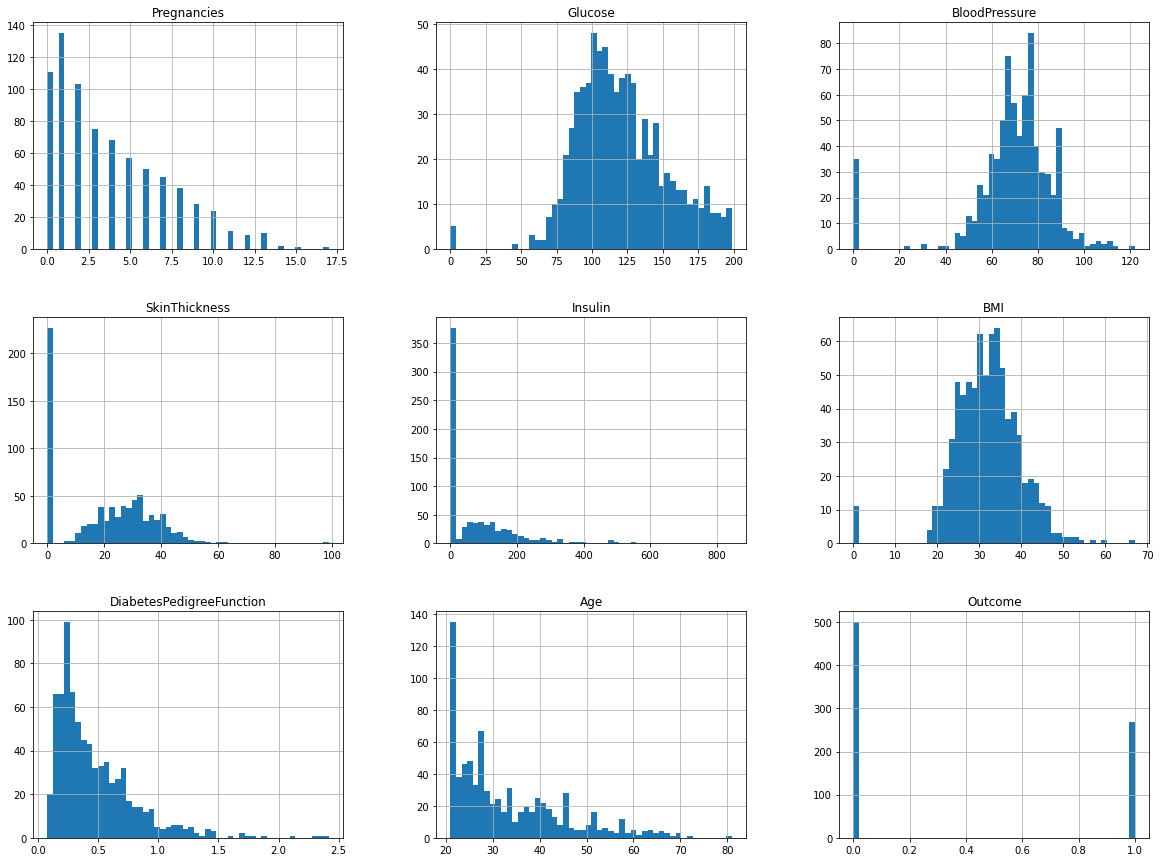

In [4]:
data.hist(bins = 50, figsize = (20, 15))

**Clean the data to get rid of infeasible values and replace with mean values (Ex. Blood pressure should not be 0)**

In [5]:
data['Glucose'].replace(to_replace = 0, value = data['Glucose'].mean(), inplace = True)
data['BloodPressure'].replace(to_replace = 0, value = data['BloodPressure'].mean(), inplace = True)
data['SkinThickness'].replace(to_replace = 0, value = data['SkinThickness'].mean(), inplace = True)
data['Insulin'].replace(to_replace = 0, value = data['Insulin'].mean(), inplace = True)
data['BMI'].replace(to_replace = 0, value = data['BMI'].mean(), inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Separate the data into features (x) and label (y).**
- y is the outcome of whether the patient has diabetes or not
- x contains all of the 8 numerical input columns

In [8]:
attributes = ['Pregnancies',
             'Glucose',
             'BloodPressure',
             'SkinThickness',
             'Insulin',
             'BMI',
             'DiabetesPedigreeFunction',
             'Age']
x = data[attributes]
y = data['Outcome']

**Split the data into train and test sets.**

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Visualize the quantities of all of the inputs in the dataset.**

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>]],
      dtype=object)

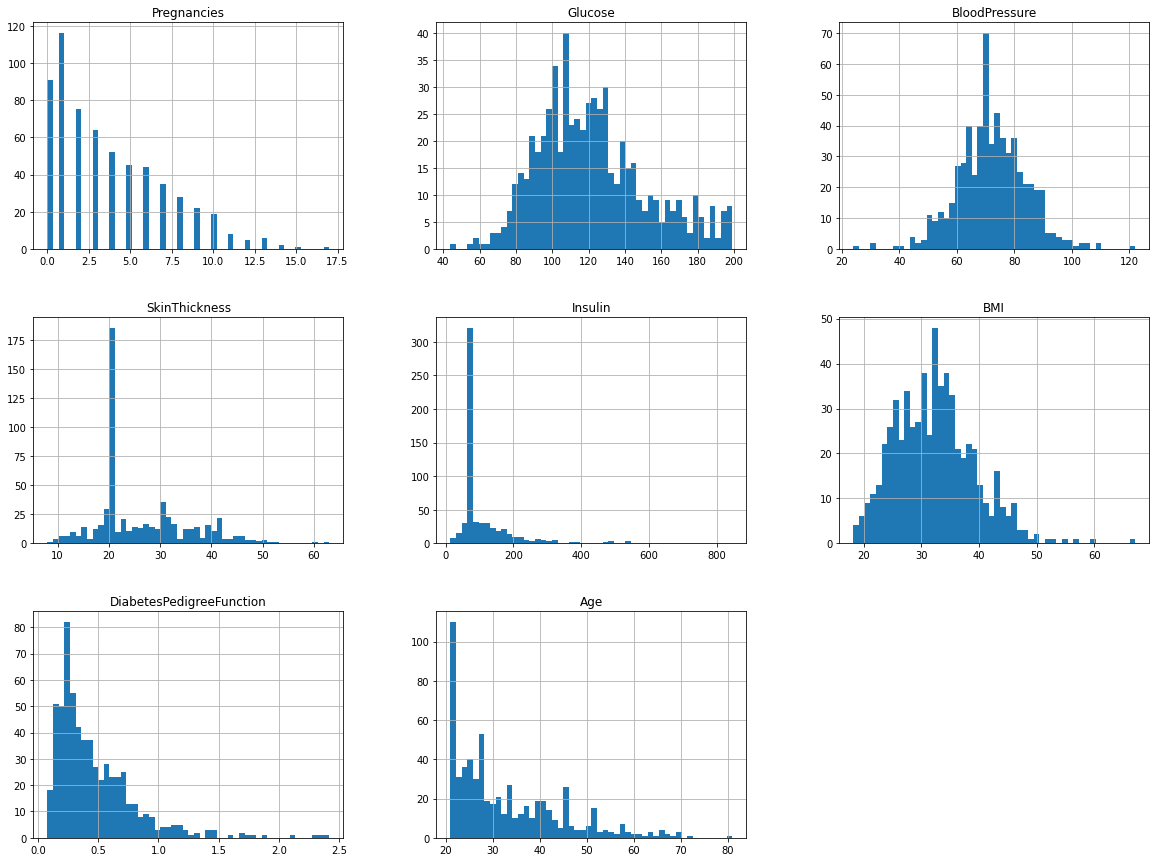

In [10]:
x_train.hist(bins = 50, figsize = (20, 15))

**Visualize the number of patients that have diabetes vs the number that do not have diabetes.**

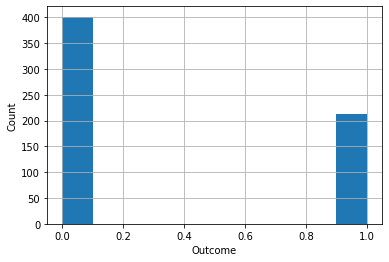

In [11]:
y_train.hist()
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

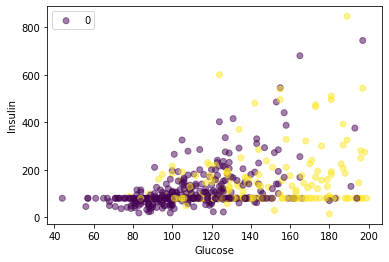

In [12]:
plt.scatter(x_train['Glucose'], x_train['Insulin'], c = y_train, alpha = 0.5)
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.legend(labels = y_train)
plt.show()

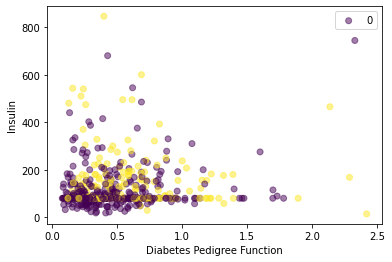

In [13]:
plt.scatter(x_train['DiabetesPedigreeFunction'], x_train['Insulin'], c = y_train, alpha = 0.5)
plt.xlabel('Diabetes Pedigree Function')
plt.ylabel('Insulin')
plt.legend(labels = y_train)
plt.show()

array([[<AxesSubplot:xlabel='Pregnancies', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='Glucose', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='BloodPressure', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='SkinThickness', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='Insulin', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='BMI', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='Age', ylabel='Pregnancies'>],
       [<AxesSubplot:xlabel='Pregnancies', ylabel='Glucose'>,
        <AxesSubplot:xlabel='Glucose', ylabel='Glucose'>,
        <AxesSubplot:xlabel='BloodPressure', ylabel='Glucose'>,
        <AxesSubplot:xlabel='SkinThickness', ylabel='Glucose'>,
        <AxesSubplot:xlabel='Insulin', ylabel='Glucose'>,
        <AxesSubplot:xlabel='BMI', ylabel='Glucose'>,
        <AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>,
        <AxesSubplot:xlabel='Age', ylabel='

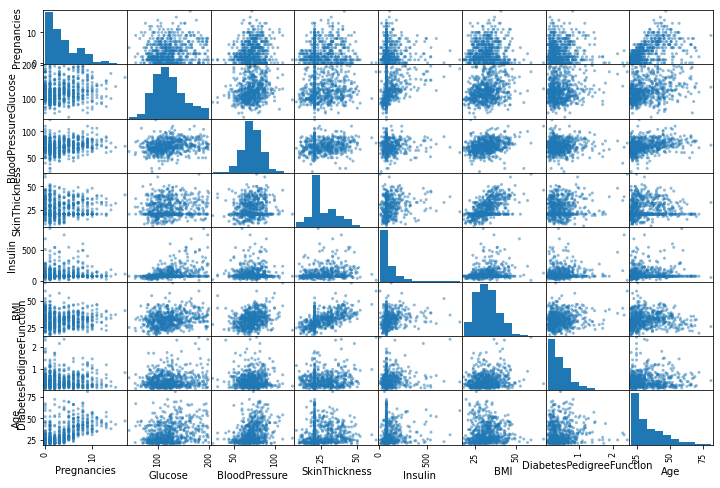

In [14]:
from pandas.plotting import scatter_matrix
scatter_matrix(x_train, figsize = (12, 8))

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_train)

In [16]:
corr_matrix = pd.DataFrame(x_scaled).corr(method='pearson')
print(corr_matrix)

          0         1         2         3         4         5         6  \
0  1.000000  0.142337  0.190689  0.028002 -0.017780  0.018547 -0.018944   
1  0.142337  1.000000  0.208310  0.106073  0.396538  0.227945  0.142037   
2  0.190689  0.208310  1.000000  0.128623  0.023734  0.273209  0.022779   
3  0.028002  0.106073  0.128623  1.000000  0.233691  0.557767  0.158373   
4 -0.017780  0.396538  0.023734  0.233691  1.000000  0.192440  0.140074   
5  0.018547  0.227945  0.273209  0.557767  0.192440  1.000000  0.161553   
6 -0.018944  0.142037  0.022779  0.158373  0.140074  0.161553  1.000000   
7  0.553048  0.275859  0.321008 -0.002818  0.040405  0.009320  0.020052   

          7  
0  0.553048  
1  0.275859  
2  0.321008  
3 -0.002818  
4  0.040405  
5  0.009320  
6  0.020052  
7  1.000000  


**Highest Correlations.**
- Pregnancies and Age
- Skin Thickness and BMI
- Glucose and Insulin

**Attributes with Lowest Correlation Coefficients**
- Blood Pressure
- Diabetes Pedigree Function

In [17]:
del x_train['BloodPressure']
del x_train['DiabetesPedigreeFunction']

del x_test['BloodPressure']
del x_test['DiabetesPedigreeFunction']

In [18]:
x_scaled2 = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [19]:
corr_matrix2 = pd.DataFrame(x_scaled2).corr(method='pearson')
print(corr_matrix2)

          0         1         2         3         4         5
0  1.000000  0.142337  0.028002 -0.017780  0.018547  0.553048
1  0.142337  1.000000  0.106073  0.396538  0.227945  0.275859
2  0.028002  0.106073  1.000000  0.233691  0.557767 -0.002818
3 -0.017780  0.396538  0.233691  1.000000  0.192440  0.040405
4  0.018547  0.227945  0.557767  0.192440  1.000000  0.009320
5  0.553048  0.275859 -0.002818  0.040405  0.009320  1.000000


**Gaussian Naive Bayes**

In [20]:
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()
clf_gnb.fit(x_scaled2, y_train)

GaussianNB()

In [21]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, clf_gnb.predict(x_test_scaled)))

0.7467532467532467


In [22]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(clf_gnb, x_test_scaled, y_test, cv = 3, scoring = "accuracy"))

[0.75       0.76470588 0.74509804]


In [23]:
from sklearn.model_selection import cross_val_predict
clf_gnb_pred = cross_val_predict(clf_gnb, x_test_scaled, y_test,cv = 3)

In [24]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, clf_gnb_pred))

[[83 16]
 [22 33]]


In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision Score:", precision_score(y_test, clf_gnb_pred))
print("Recall Score:", recall_score(y_test, clf_gnb_pred))
print("F1 Score:", f1_score(y_test, clf_gnb_pred))

Precision Score: 0.673469387755102
Recall Score: 0.6
F1 Score: 0.6346153846153846


In [26]:
y_gnb_score = cross_val_predict(clf_gnb, x_test_scaled, y_test, cv = 3, method = "predict_proba")

In [27]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_gnb_score[:,1]))

0.7950413223140496


**Decision Tree**

In [28]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier(random_state=42)
clf_tree.fit(x_scaled2, y_train)

DecisionTreeClassifier(random_state=42)

In [29]:
print(metrics.accuracy_score(y_test, clf_tree.predict(x_test_scaled)))

0.7012987012987013


In [30]:
print(cross_val_score(clf_tree, x_test_scaled, y_test, cv = 3, scoring = "accuracy"))

[0.63461538 0.66666667 0.68627451]


In [31]:
clf_tree_pred = cross_val_predict(clf_tree, x_test_scaled, y_test,cv = 3)

In [32]:
print(confusion_matrix(y_test, clf_tree_pred))

[[75 24]
 [28 27]]


In [33]:
print("Precision Score:", precision_score(y_test, clf_tree_pred))
print("Recall Score:", recall_score(y_test, clf_tree_pred))
print("F1 Score:", f1_score(y_test, clf_tree_pred))

Precision Score: 0.5294117647058824
Recall Score: 0.4909090909090909
F1 Score: 0.5094339622641509


In [34]:
y_tree_score = cross_val_predict(clf_tree, x_test_scaled, y_test, cv = 3, method = "predict_proba")

In [35]:
print(roc_auc_score(y_test, y_tree_score[:,1]))

0.6242424242424243


**KNN**

In [36]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier()
clf_knn.fit(x_scaled2, y_train)

KNeighborsClassifier()

In [37]:
print(metrics.accuracy_score(y_test, clf_knn.predict(x_test_scaled)))

0.7207792207792207


In [38]:
print(cross_val_score(clf_knn, x_test_scaled, y_test, cv = 3, scoring = "accuracy"))

[0.71153846 0.82352941 0.68627451]


In [39]:
clf_knn_pred = cross_val_predict(clf_knn, x_test_scaled, y_test,cv = 3)

In [40]:
print(confusion_matrix(y_test, clf_knn_pred))

[[81 18]
 [22 33]]


In [41]:
print("Precision Score:", precision_score(y_test, clf_knn_pred))
print("Recall Score:", recall_score(y_test, clf_knn_pred))
print("F1 Score:", f1_score(y_test, clf_knn_pred))

Precision Score: 0.6470588235294118
Recall Score: 0.6
F1 Score: 0.6226415094339622


In [42]:
y_knn_score = cross_val_predict(clf_knn, x_test_scaled, y_test, cv = 3, method = "predict_proba")

In [43]:
print(roc_auc_score(y_test, y_knn_score[:,1]))

0.7228650137741046


**Logistic Regression**

In [44]:
from sklearn.linear_model import LogisticRegression
clf_log = LogisticRegression(random_state=42)
clf_log.fit(x_scaled2, y_train)

LogisticRegression(random_state=42)

In [45]:
print(metrics.accuracy_score(y_test, clf_log.predict(x_test_scaled)))

0.7597402597402597


In [46]:
print(cross_val_score(clf_log, x_test_scaled, y_test, cv = 3, scoring = "accuracy"))

[0.75       0.82352941 0.82352941]


In [47]:
clf_log_pred = cross_val_predict(clf_log, x_test_scaled, y_test,cv = 3)

In [48]:
print(confusion_matrix(y_test, clf_log_pred))

[[87 12]
 [19 36]]


In [49]:
print("Precision Score:", precision_score(y_test, clf_log_pred))
print("Recall Score:", recall_score(y_test, clf_log_pred))
print("F1 Score:", f1_score(y_test, clf_log_pred))

Precision Score: 0.75
Recall Score: 0.6545454545454545
F1 Score: 0.6990291262135923


In [50]:
y_log_score = cross_val_predict(clf_log, x_test_scaled, y_test, cv = 3, method = "predict_proba")

In [51]:
print(roc_auc_score(y_test, y_log_score[:,1]))

0.8126721763085399


**Rank of Highest Recall Scores**
- Logistic Regression (0.655)
- Naive Bayes (0.6)
- KNN (0.6)
- Decision Tree (0.491)


In [52]:
from sklearn.ensemble import VotingClassifier
clf1 = GaussianNB()
clf2 = tree.DecisionTreeClassifier(random_state=42)
clf3 = KNeighborsClassifier()
clf4 = LogisticRegression(random_state=42)

In [53]:
eclf1 = VotingClassifier(estimators=[('nb', clf1), ('knn', clf3), ('lr', clf4)])

In [54]:
eclf1.fit(x_scaled2, y_train)

VotingClassifier(estimators=[('nb', GaussianNB()),
                             ('knn', KNeighborsClassifier()),
                             ('lr', LogisticRegression(random_state=42))])

In [55]:
print(metrics.accuracy_score(y_test, eclf1.predict(x_test_scaled)))

0.7467532467532467


In [56]:
print(cross_val_score(eclf1, x_test_scaled, y_test, cv = 3, scoring = "accuracy"))

[0.73076923 0.82352941 0.76470588]


In [57]:
eclf1_pred = cross_val_predict(eclf1, x_test_scaled, y_test,cv = 3)

In [58]:
print(confusion_matrix(y_test, eclf1_pred))

[[85 14]
 [21 34]]


In [59]:
print("Precision Score:", precision_score(y_test, eclf1_pred))
print("Recall Score:", recall_score(y_test, eclf1_pred))
print("F1 Score:", f1_score(y_test, eclf1_pred))

Precision Score: 0.7083333333333334
Recall Score: 0.6181818181818182
F1 Score: 0.6601941747572815
